# Wrangle Notebook

## Step 1 | Acquiring the Data
> `MVI` is Maternal Vulnerability Index, a scale from 0 - 100 that represents the vulnerability score of mothers, with 0 being the least vulnerable and 100 being the most vulnerable.

Data Sources 
- MVI - County (csv) | MVI data by county
- MVI - State (csv) | MVI data state
- ACS_2017 County Data (csv) | Demographics by county
- US Counties (csv) | Geodata and population by county

Info files
- MVI Data Architecture and Sources
- MVI Data Dictionary

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None) #to prevent df columns from being truncated (scroll :)

#### Reading in the `mvi_county` csv file to a df

In [2]:
# MVI - County (csv) | MVI
df_mvi_county = pd.read_csv('mvi_county.csv')
df_mvi_county.head(2)

,GEOID,State,state_GEOID,county_name,mvi,Th1,Th2,Th3,Th4,Th5,Th6
0,2282,Alaska,2,Yakutat,48.58,17.38,52.98,36.55,94.52,16.43,78.32
1,2060,Alaska,2,Bristol Bay,41.17,27.76,64.85,30.31,71.47,13.66,58.90


In [3]:
print(f'There are {df_mvi_county.shape[0]} rows and {df_mvi_county.shape[1]} columns in the mvi_county data')
print(f'There are {df_mvi_county.isna().sum().sum()} null values.')

There are 3142 rows and 11 columns in the mvi_county data
There are 0 null values.


#### Reading in the `county_data` csv file to a df

In [4]:
# ACS_2017 County Data (csv) | Demographics
df_county_data = pd.read_csv('acs2017_county_data.csv')
df_county_data.head(2)


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5


In [5]:
print(f'There are {df_county_data.shape[0]} rows and {df_county_data.shape[1]} columns in the mvi_county data')
print(f'There are {df_county_data.isna().sum().sum()} null values.')

There are 3220 rows and 37 columns in the mvi_county data
There are 1 null values.


In [6]:
df_county_data.isna().sum()

CountyId            0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        1
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

#### There is one null value in the `ChildPoverty` field. Let's take a look....

In [7]:
df_county_data[df_county_data.ChildPoverty.isna() == True]

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao County,86,41,45,4.7,20.9,0.0,0.0,29.1,33.7,84,61750,11280,46024,7959,12.7,NaN,22.2,38.1,20.6,0.0,19.0,32.8,9.4,0.0,40.6,10.9,6.3,6.6,63,34.9,61.9,3.2,0.0,0.0


#### ...since this is just one observation, will simply drop this column for the MVP

In [8]:
df_county_data.dropna(inplace = True)

#### Looking at the data I can see that the `mvi` dataset provides lots of great information about the actual vulnerability scores and the `county_data` has lots of great demographic data that can be used to further explore what could be driving the mvi scores, along with the various sub-scores that are direct drivers of the mvi.
Both tables have a column with the FIPS Codes for each county and I can use this to join them, performing an `inner_join` to eliminate having to wrangle any nulls this first pass for the mvp.
>I am going to set the `mvi` df index as `GEOID` and the `county_data` index as `CountyId`, as these are the columns in each df that store the county's FIPS Codes.

In [9]:
df_mvi_county.set_index('GEOID', inplace = True)
df_county_data.set_index('CountyId', inplace = True)

In [10]:
df_mvi_county.head(2)

,State,state_GEOID,county_name,mvi,Th1,Th2,Th3,Th4,Th5,Th6
GEOID,,,,,,,,,,
2282,Alaska,2,Yakutat,48.58,17.38,52.98,36.55,94.52,16.43,78.32
2060,Alaska,2,Bristol Bay,41.17,27.76,64.85,30.31,71.47,13.66,58.90


In [11]:
df_county_data.head(2)

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CountyId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5


### Now that the indexes are set as the columns with the FIPS Codes, ready to join the two dfs

In [12]:
df_joinsd = df_mvi_county.join(df_county_data, how = 'inner', lsuffix = '_mvi', rsuffix = '_cd')

In [13]:
df_joinsd.head(2)

,State_mvi,state_GEOID,county_name,mvi,Th1,Th2,Th3,Th4,Th5,Th6,State_cd,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2282,Alaska,2,Yakutat,48.58,17.38,52.98,36.55,94.52,16.43,78.32,Alaska,Yakutat City and Borough,682,366,316,5.6,43.7,0.9,28.3,5.4,1.3,522,64583,11434,32393,4250,6.2,10.1,24.9,18.6,23.6,21.0,11.9,48.7,14.3,0.8,26.9,5.0,4.2,6.5,377,45.6,44.0,10.3,0.0,6.5
2060,Alaska,2,Bristol Bay,41.17,27.76,64.85,30.31,71.47,13.66,58.90,Alaska,Bristol Bay Borough,917,532,385,4.5,50.3,0.4,34.4,1.4,0.3,694,79500,10833,42002,4224,7.1,11.6,30.5,18.5,21.1,15.4,14.6,58.9,16.0,0.2,17.6,4.1,3.1,9.4,508,54.3,34.6,11.0,0.0,6.8


In [14]:
print(f'Verifying there are no null values in joined df. . . \nNull Count: {df_joinsd.isna().sum().sum()}')

Verifying there are no null values in joined df. . . 
Null Count: 0


In [15]:
df_joinsd.state_GEOID.value_counts()

48    254
13    159
51    133
21    120
29    115
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
40     77
5      75
55     72
12     67
1      67
42     67
46     66
22     64
8      64
36     62
6      58
30     56
54     55
38     53
45     46
16     44
53     39
41     36
35     33
49     29
2      29
24     24
56     23
34     21
32     17
23     16
4      15
25     14
50     14
33     10
9       8
44      5
15      4
10      3
11      1
Name: state_GEOID, dtype: int64

## Step 2 | Cleaning the data

#### For the mvp I will look at the following x26 columns
- 0: `State_mvi` changing the name to `state`
- 1-5: `th1 through 5`
- 6: `County` changing the name to `county`
- 7: `TotalPop` changing the name to `pop_tot`
- 8: `Men` to `men_pop 
- 9: `Women` to `women_pop`
- 10: `Hispanic` to `hisp_pop`
- 11: `White` to `wht_pop_perc`
- 12: `Black` to `black_pop_perc`
- 13: `Native` to `nativ_pop_perc`
- 14: `Asian` to `asian_pop_perc`
- 15: `Pacific` to `pacif_pop_perc`
- 16: `VotingAgeCitizen` to `citiz_voter_age`
- 17: `Income` to `avg_income`
- 18: `Poverty` to pov_perc
- 19: `ChildPoverty` to `child_pov_perc`
- 20: `WorkAtHome` to `wfh
- 21: `MeanCommute` to `avg_commut`
- 22: `employed`
- 23: `SelfEmployed` to `self_employed`
- 24: `unemployment`
- 25: `mvi`

In [16]:
# creating a list that will be used later in the data cleanup function
cols_to_keep = ['State_mvi', 'Th1', 'Th2', 'Th3', 'Th4', 'Th5', 'County', 'TotalPop', 'Men', 'Women',\
                'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income',\
                'Poverty', 'ChildPoverty', 'WorkAtHome', 'MeanCommute', 'Employed', 'SelfEmployed',\
                'Unemployment', 'mvi']

In [18]:
# filtering the new df to only the cols_to_keep list of columns
df_joinsd = df_joinsd[cols_to_keep]

# lowercasing all column names
df_joinsd.columns = df_joinsd.columns.str.lower()

In [27]:
# editing names of columns to make easier to read and understand what they are
df_joinsd.rename(columns = {'state_mvi': 'state', 'totalpop':'pop_total', 'men':'pop_men', 'women':'pop_women',\
                           'votingagecitizen':'pop_vot_age', 'childpoverty':'child_poverty', 'workathome':'wfh',\
                           'meancommute':'avg_commute', 'self_employed':'self_employ'}, inplace = True)

df_joinsd.head()

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi
2282,Alaska,17.38,52.98,36.55,94.52,16.43,Yakutat City and Borough,682,366,316,5.6,43.7,0.9,28.3,5.4,1.3,522,64583,6.2,10.1,4.2,6.5,377,10.3,6.5,48.58
2060,Alaska,27.76,64.85,30.31,71.47,13.66,Bristol Bay Borough,917,532,385,4.5,50.3,0.4,34.4,1.4,0.3,694,79500,7.1,11.6,3.1,9.4,508,11.0,6.8,41.17
2230,Alaska,11.65,5.28,13.37,79.82,6.21,Skagway Municipality,1038,594,444,6.8,78.6,0.2,5.3,4.0,0.0,870,70673,5.6,5.3,6.5,6.1,701,7.8,7.9,7.10
2164,Alaska,46.32,71.63,52.75,94.33,81.73,Lake and Peninsula Borough,1301,661,640,1.5,21.8,0.7,66.7,2.2,0.2,911,45208,16.5,19.2,3.4,6.7,581,5.0,13.2,87.17
2105,Alaska,7.04,68.58,39.73,85.04,43.17,Hoonah-Angoon Census Area,2146,1123,1023,5.5,43.6,2.7,37.3,2.7,0.1,1713,57900,11.1,24.6,10.3,9.7,1039,13.3,11.7,52.82


### Looking at `dtype` and histogram plots for each column

In [66]:
obj_list = []
int_list = []
float_list = []

for col in df_joinsd.columns:
    if df_joinsd[col].dtype == 'O':
        obj_list.append(col)
    if df_joinsd[col].dtype == 'int':
        int_list.append(col)
    if df_joinsd[col].dtype == 'float':
        float_list.append(col)
        
print(f'Objects:\n{obj_list}\n\nIntegers:\n{int_list}\n\nFloats:\n{float_list}')

Objects:
['state', 'county']

Integers:
['pop_total', 'pop_men', 'pop_women', 'pop_vot_age', 'income', 'employed']

Floats:
['th1', 'th2', 'th3', 'th4', 'th5', 'hispanic', 'white', 'black', 'native', 'asian', 'pacific', 'poverty', 'child_poverty', 'wfh', 'avg_commute', 'selfemployed', 'unemployment', 'mvi']


In [72]:
df_joinsd.head(2)

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi
2282,Alaska,17.38,52.98,36.55,94.52,16.43,Yakutat City and Borough,682,366,316,5.6,43.7,0.9,28.3,5.4,1.3,522,64583,6.2,10.1,4.2,6.5,377,10.3,6.5,48.58
2060,Alaska,27.76,64.85,30.31,71.47,13.66,Bristol Bay Borough,917,532,385,4.5,50.3,0.4,34.4,1.4,0.3,694,79500,7.1,11.6,3.1,9.4,508,11.0,6.8,41.17


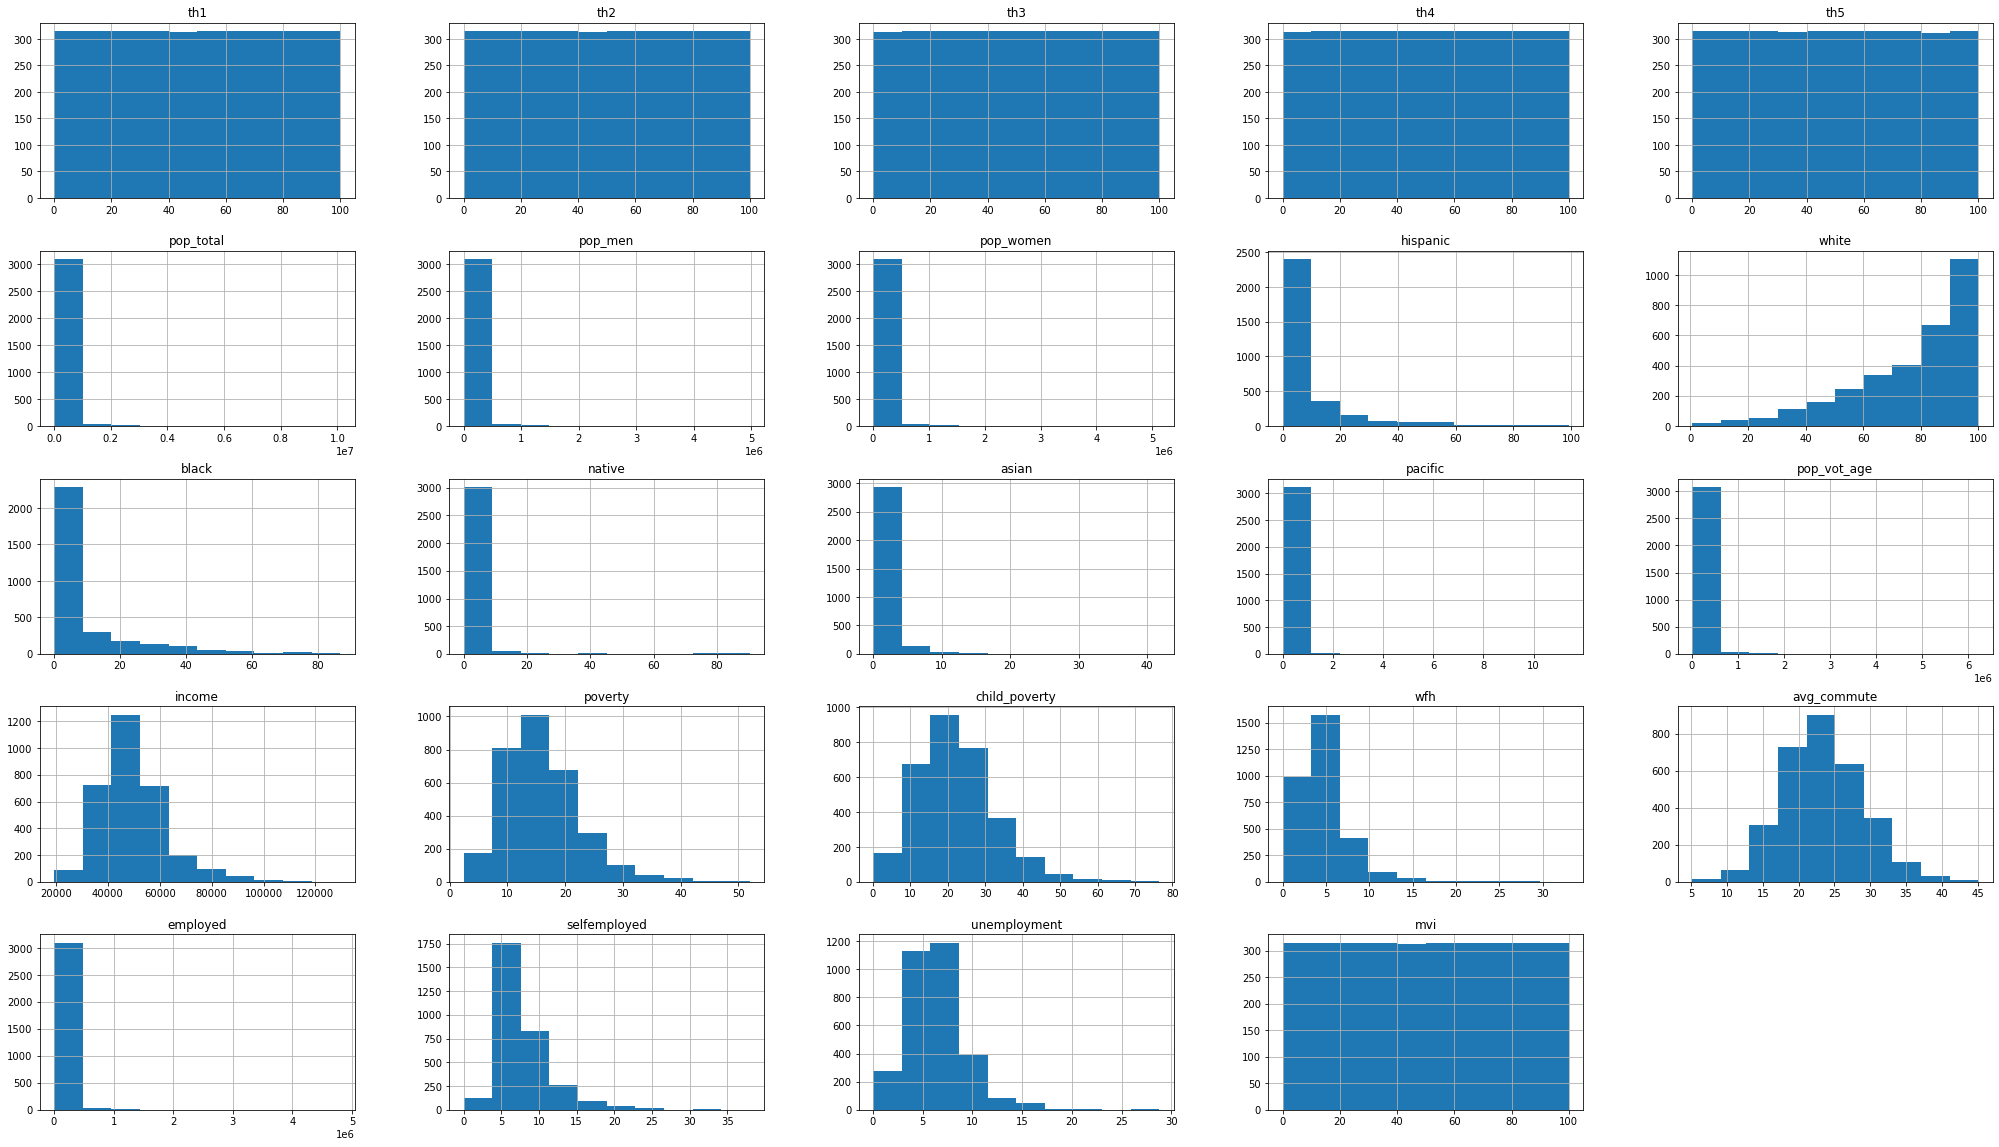

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df_joinsd.hist(figsize = (35, 20) )
plt.show()

In [68]:
for col in df_joinsd.columns:
    print(col.upper())
    print(df_joinsd[col].nunique())
    print()

STATE
51

TH1
3138

TH2
2894

TH3
3127

TH4
2722

TH5
2835

COUNTY
1876

POP_TOTAL
3098

POP_MEN
3035

POP_WOMEN
3013

HISPANIC
458

WHITE
710

BLACK
487

NATIVE
184

ASIAN
129

PACIFIC
27

POP_VOT_AGE
3061

INCOME
2996

POVERTY
333

CHILD_POVERTY
487

WFH
184

AVG_COMMUTE
304

EMPLOYED
2996

SELFEMPLOYED
216

UNEMPLOYMENT
183

MVI
2852



In [69]:
df_joinsd.head(2)

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi
2282,Alaska,17.38,52.98,36.55,94.52,16.43,Yakutat City and Borough,682,366,316,5.6,43.7,0.9,28.3,5.4,1.3,522,64583,6.2,10.1,4.2,6.5,377,10.3,6.5,48.58
2060,Alaska,27.76,64.85,30.31,71.47,13.66,Bristol Bay Borough,917,532,385,4.5,50.3,0.4,34.4,1.4,0.3,694,79500,7.1,11.6,3.1,9.4,508,11.0,6.8,41.17


### Most of the columns are continuous numeric variables with the exception of `state` and `county`, which are non-numeric, discrete variables and can also be used to create geoplots in `Tableau`
Some new features I will engineer based on the following initial hypothesis and thoughts about the data:
<br><br>
##### I think states with higher female to male to ratios will have lower `mvi` scores.
- `more_female` this will be a boolean value, does county have more males than females? 
    - `'pop_men` and `pop_women`
- `perc_female` the percentage of females in the total population
    - `pop_total` and `pop_women`
    
>## Something to come back to after mvp ... 
>##### I think, across ethnic lines, states with higher percentages of `x_minority` will have lower `mvi` scores for that particular minority group.
- `perc_[ethnic]` for each ethnicity, the percentage of that ethnicity to the total population
    - `[ethnicity]` and `pop_total` 

In [83]:
df_joinsd['more_female'] = df_joinsd.pop_women > df_joinsd.pop_men

df_joinsd['perc_female'] = round(df_joinsd.pop_women / df_joinsd.pop_total*100, 1)

df_joinsd.head(2)

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_female,perc_female
2282,Alaska,17.38,52.98,36.55,94.52,16.43,Yakutat City and Borough,682,366,316,5.6,43.7,0.9,28.3,5.4,1.3,522,64583,6.2,10.1,4.2,6.5,377,10.3,6.5,48.58,False,46.3
2060,Alaska,27.76,64.85,30.31,71.47,13.66,Bristol Bay Borough,917,532,385,4.5,50.3,0.4,34.4,1.4,0.3,694,79500,7.1,11.6,3.1,9.4,508,11.0,6.8,41.17,False,42.0


## Step 3 | Prepare
- encode (will come back to this after exploration, depending on which variables will use for modeling, non-numeric values will need to be converted to numeric
- split

#### After mvp will also scale features


In [86]:
from sklearn.model_selection import train_test_split

# creating test dataset
train_validate, test = train_test_split(df_joinsd, test_size=.2, random_state=12, stratify=df_joinsd.state)

# creating the train and test datasets
train, validate = train_test_split(train_validate, test_size=.3, random_state=12, stratify=train_validate.state)

# verifying the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [91]:
df_joinsd.state.value_counts(ascending = True).head(3)

District of Columbia    1
Delaware                3
Hawaii                  4
Name: state, dtype: int64

### I am trying to stratify on `state` so that the states are stratified across each of my datasets.
I am getting an error because the District of Columbia `state` only has one observation, but requires a minimum of 2. 
>For now I will drop this observation. DC is a location I would like to explore so, maybe after the first iteration of the project I will find a way around this, to include it

In [92]:
df_joinsd[df_joinsd.state == 'District of Columbia']

,state,th1,th2,th3,th4,th5,county,pop_total,pop_men,pop_women,hispanic,white,black,native,asian,pacific,pop_vot_age,income,poverty,child_poverty,wfh,avg_commute,employed,selfemployed,unemployment,mvi,more_female,perc_female
11001,District of Columbia,0.32,40.18,68.58,13.94,55.97,District of Columbia,672391,319046,353345,10.7,36.0,46.9,0.2,3.7,0.0,503112,77649,17.4,25.5,5.7,30.0,357701,4.3,8.0,40.53,True,52.6


In [95]:
# dropping DC observation from df

df_joinsd.drop(11001, inplace = True)

##### Going to try `train_test_split` again

In [96]:
from sklearn.model_selection import train_test_split

# creating test dataset
train_validate, test = train_test_split(df_joinsd, test_size=.2, random_state=12, stratify=df_joinsd.state)

# creating the train and test datasets
train, validate = train_test_split(train_validate, test_size=.3, random_state=12, stratify=train_validate.state)

# verifying the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (1758, 28)
validate -> (754, 28)
test -> (628, 28)


# Data is wrangled and ready for exploration.
See a`wrangle.py` for wrangle code and functions. 